<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK



Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...

#Etape 1 - Importation des librairies et chargement des fichiers

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importation de la librairie plotly express
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier web.xlsx
df_web = pd.read_excel('/content/drive/MyDrive/Formation DATA ANALYST/P6/web.xlsx')
#Importation du fichier erp.xlsx
df_erp = pd.read_excel('/content/drive/MyDrive/Formation DATA ANALYST/P6/erp.xlsx')
#Importation du fichier liaison.xlsx
df_liaison = pd.read_excel('/content/drive/MyDrive/Formation DATA ANALYST/P6/liaison.xlsx')

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
#Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium
#df.info()

#Etape 2 - Analyse exploratoire des fichiers

##2.1 - Analyse exploratoire du fichier erp.xlsx

In [ ]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0])) #.format() permet d'insérer des (variables) dans une chaîne de caractères {variable}
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [ ]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id

df_erp['product_id'].duplicated().sum() # .duplicate identifie les doublons (True si la valeur est déjà apparue dans la colonne)
                                        # .sum compte le nombre total de doublons dans 'product_id'

np.int64(0)

In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ? >>>> A stock_quantity

df_erp['stock_status'].unique()


array(['instock', 'outofstock'], dtype=object)

In [ ]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"

df_erp['stock_status_2'] = np.where((df_erp['stock_quantity'] == 0) | (df_erp['stock_quantity'].isna()), 'outofstock','instock')
df_erp.head()

# np.where() permet de créer une nouvelle colonne à partir d'une condition A et B. Si A (= 0 ou na) alors outofstock / Sinon = B (instock)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock


In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:

comparaison = df_erp["stock_status"] == df_erp["stock_status_2"]
print(comparaison)

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool


In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 825 qui correspond au nombre de lignes dans ce dataset

print(comparaison.value_counts())


True     821
False      4
Name: count, dtype: int64


In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart

diff_stock = df_erp.loc[df_erp['stock_status'] != df_erp['stock_status_2']]

diff_stock.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock


In [ ]:
#Corriger la ou les données incohérentes

# Modifier les valeurs négative car incohérente, en valeur positive. Je pars du principe que erreur de saisie.
df_erp.loc[df_erp['product_id'] == 4973, 'stock_quantity'] = 10
df_erp.loc[df_erp['product_id'] == 5700, 'stock_quantity'] = 1

# Corriger les écrats (outofstock alors que valeur >0 et vice versa)
df_erp['stock_status'] = np.where(df_erp['stock_quantity'] > 0, 'instock', 'outofstock') # Marque instock si au moins 1 unité, sinon outofstock grace à np.where


In [ ]:
#Vérification en utilisant le même code que plus haut pour afficher les problèmes

comparaison_2 = df_erp["stock_status"] == df_erp["stock_status_2"] # Création d'une série booléenne : True si les deux colonnes sont égales ligne par ligne, sinon False
sum_comparaison_2 = comparaison_2.value_counts()                   # Compte le nombre de True et de False
print(sum_comparaison_2)

# On a bien nos 825 lignes du dataset

True    825
Name: count, dtype: int64


##2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx

###2.1.1.1 - Analyse de la variable PRIX

In [ ]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatifs ou nuls?

# Nombre de prix non renseignés (NaN)
prix_manquant = df_erp['price'].isna().sum()
print(f"Prix manquant (NaN) : {prix_manquant}")

# Nombre de prix négatifs
prix_negatif = (df_erp['price'] < 0).sum()
print(f"Prix négatif : {prix_negatif}")

# Nombre de prix nuls
prix_nul = (df_erp['price'] == 0).sum()
print(f"Prix nul : {prix_nul}")

# Afficher toutes les lignes où price est NaN, <= 0
problemes_prix = df_erp.loc[df_erp['price'].isna() | (df_erp['price'] <= 0)]
problemes_prix[['product_id', 'price', 'purchase_price']].head(10)




Prix manquant (NaN) : 0
Prix négatif : 3
Prix nul : 0


,product_id,price,purchase_price
151,4233,-20.0,10.33
469,5017,-8.0,4.34
739,6594,-9.1,4.61


In [ ]:
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'articles avec un prix non renseigné: {}".format(df_erp['price'].isna().sum())) #Saisir l'instruction manquante dans la fonction format


Nombres d'articles avec un prix non renseigné: 0


In [ ]:
#Afficher le prix minimum de la colonne "price"

valeur_min = df_erp['price'].min()
print(f"Prix minimum : {valeur_min}")


Prix minimum : -20.0


In [ ]:
#Afficher le prix maximum de la colonne "price"

valeur_max = df_erp['price'].max()
print(f"Prix maximum : {valeur_max}")

Prix maximum : 225.0


In [ ]:
#Afficher les prix inférieurs à 0

prix_negatifs = df_erp.loc[df_erp['price'] < 0]
prix_negatifs.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


In [ ]:
#(qu'est-ce qu'il faut en faire ?) Je choisi de les traiter comme
#les valeurs négatives des stocks, comme s'il s'agissait d'une erreur de saisie. Je les remplace par des valeurs positives.

df_erp['price'] = df_erp['price'].abs() # .abs() applique la valeur absolue à chaque élément (transforme -10 en 10)

In [ ]:
# Verification

prix_neg_verif = df_erp.loc[df_erp['price'] < 0]
prix_neg_verif.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


###2.1.1.2 - Analyse de la variable STOCK

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
stock_min = df_erp['stock_quantity'].min()

#Afficher la quantité maximum de la colonne "stock_quantity"
stock_max = df_erp['stock_quantity'].max()

#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
stock_negatif = df_erp.loc[df_erp['stock_quantity'] < 0]

print(f"stock min : {stock_min}")
print(f"stock max : {stock_max}")
stock_negatif.head(10)


# Valeur stock négatif déja corrigé plus haut [14]

stock min : 0
stock max : 145


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


###2.1.1.3 - Analyse de la variable ONSALE_WEB

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?  0 pas en vente sur le web; 1 en vente sur le web

# Afficher les valeurs distinctes de la colonne 'onsale_web'
valeurs_distinctes = df_erp['onsale_web'].unique()
print("Valeurs distinctes :", valeurs_distinctes)

# Compter le nombre d’occurrences pour chaque valeur
compte = df_erp['onsale_web'].value_counts()
print("\nRépartition des valeurs :\n", compte)


Valeurs distinctes : [1 0]

Répartition des valeurs :
 onsale_web
1    716
0    109
Name: count, dtype: int64


In [ ]:
#Quelles sont les colonnes à conserver selon vous?

# product_id - onsale_web - price - stock_quantity - stock_status - purchase_price



In [ ]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".

df_erp = df_erp.drop(columns=['stock_status_2'])


In [ ]:
# Vérification de la suppression
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77


###2.1.1.4 - Analyse de la variable prix d'achat

In [ ]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
pp_isna = df_erp['purchase_price'].isna().sum()
print("Nombre de purchase_price manquants :", pp_isna)

#Afficher le prix minimum de la colonne "purchase_price"
print("Prix minimum purchase_price :", df_erp['purchase_price'].min())

#Afficher le prix maximum de la colonne "purchase_price"
print("Prix maximum purchase_price :", df_erp['purchase_price'].max())

Nombre de purchase_price manquants : 0
Prix minimum purchase_price : 2.74
Prix maximum purchase_price : 137.81


In [ ]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


##Dernier nettoyage fichier erp

In [ ]:
# Doublons, valeurs manquantes, valeurs négatives, inchoérence stock > NETTOYE
# Il reste encore le type de donnée à modifier.

# Conversion de product_id en string (clé d’identification, pas une valeur numérique)
df_erp['product_id'] = df_erp['product_id'].astype("string")

# Conversion de onsale_web en booléen (0 = False, 1 = True)
df_erp['onsale_web'] = df_erp['onsale_web'].astype("bool")

# Conversion stock_status en string
df_erp['stock_status'] = df_erp['stock_status'].astype("string")

In [ ]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    string 
 1   onsale_web      825 non-null    bool   
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    string 
 5   purchase_price  825 non-null    float64
dtypes: bool(1), float64(2), int64(1), string(2)
memory usage: 33.2 KB


#2.2 - Analyse exploratoire du fichier web.xlsx


In [ ]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques

df_web.shape

(1513, 29)

In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?

# sku - total_sales - post_date - product_type - post_title

In [ ]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération

# Créer un nouveau DataFrame en ne conservant que les colonnes souhaitées (dans une liste)
colonnes_a_conserver = [
    'sku',
    'total_sales',
    'post_date',
    'product_type',
    'post_title',
    'post_type',
]

df_web2 = df_web.loc[:, colonnes_a_conserver].copy()

# Vérification
df_web2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sku           1428 non-null   object        
 1   total_sales   1430 non-null   float64       
 2   post_date     1430 non-null   datetime64[ns]
 3   product_type  1429 non-null   object        
 4   post_title    1430 non-null   object        
 5   post_type     1430 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 71.1+ KB


In [ ]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

# Conversion en dtype "string" (object peu apporter des erreurs car trop varié)
df_web2['sku'] = df_web2['sku'].astype("string")

# Création d’un masque booléen pour identifier les valeurs de 'sku' non conformes
mask_invalid = ~df_web2['sku'].str.match(r'^[0-9]+$', na=False) # .str.match() vérifie si chaque valeur correspond à une suite de chiffres uniquement (^[0-9]+$)
                                                                # na=False permet de considérer les valeurs manquantes comme non conformes
                                                                # Le ~ inverse le masque : on garde True si la valeur NE correspond PAS au format attendu

skus_non_conformes = df_web2.loc[mask_invalid, 'sku'].unique() # Extraction des valeurs uniques non conformes dans la colonne 'sku'
                                                               # On utilise le masque 'mask_invalid' pour filtrer les lignes concernées
                                                               # .loc[... , 'sku'] permet de sélectionner uniquement la colonne 'sku'
                                                               # .unique() retourne la liste des valeurs non conformes sans doublons
print("SKUs non conformes :", skus_non_conformes)


SKUs non conformes : <StringArray>
[<NA>, '13127-1', 'bon-cadeau-25-euros']
Length: 3, dtype: string


In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
# voir [33]

In [ ]:
#Identifier les lignes sans code article

sans_sku = df_web2['sku'].isna() | (df_web2['sku'] == '')
lignes_sans_sku = df_web2.loc[sans_sku]

print(f"{len(lignes_sans_sku)} lignes sans code article (sku) ou vides trouvées.")
lignes_sans_sku.head(85)


85 lignes sans code article (sku) ou vides trouvées.


,sku,total_sales,post_date,product_type,post_title,post_type
8,<NA>,NaN,NaT,NaN,NaN,NaN
20,<NA>,NaN,NaT,NaN,NaN,NaN
30,<NA>,NaN,NaT,NaN,NaN,NaN
37,<NA>,NaN,NaT,NaN,NaN,NaN
41,<NA>,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...
1384,<NA>,NaN,NaT,NaN,NaN,NaN
1429,<NA>,NaN,NaT,NaN,NaN,NaN
1432,<NA>,NaN,NaT,NaN,NaN,NaN
1445,<NA>,NaN,NaT,NaN,NaN,NaN


In [ ]:
#Pour les codes articles identifiés, réaliser une analyse et définir l'action à entreprendre

#Toutes les valeurs des colonnes sont vides, ou ne ne sont pas identifiable. Je decide de les supprimer car pas assez de données.

df_web2 = df_web2.dropna(subset=['sku']) # .dropna supprime les NaN et subset précise la colonne concernée sinon tous les NaN de toutes les colonnes sont supprimé
df_web2.reset_index(drop=True, inplace=True)

In [ ]:
# Vérification

lignes_vides = df_web2.loc[df_web2['sku'].isna()]
lignes_vides.head(10)

,sku,total_sales,post_date,product_type,post_title,post_type


In [ ]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?

doublons_sku_web2 = df_web2['sku'].duplicated().sum()
print(f"SKU en doublon : {doublons_sku_web2}")

SKU en doublon : 714


In [ ]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_no_sku = df_web[df_web['sku'].isna() | (df_web['sku'] == '')].copy()

In [ ]:
#2 - Utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
df_no_sku.info()
#3 - Que constatez-vous?
# Sur les 85 lignes sans code article (sku) :
# - Seulement 2 lignes contiennent des données exploitables (non nulles) dans les colonnes principales comme : post_title, total_sales, post_status, etc.
# - La majorité des lignes (83/85) sont entièrement vides ou uniquement remplies de zéros automatiques (ex : rating_count, downloadable, etc.).
# - Ces lignes ne permettent pas d’identifier un produit, ni d’en déduire un comportement de vente.
# - Décision : ces lignes ne sontpas exploitables et seront exclues du dataset final.

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           2 non-null      object        
 13  post_title

In [ ]:
# Sélectionner et afficher les lignes où total_sales n’est pas NaN
lignes_total_sales = df_no_sku.loc[df_no_sku['total_sales'].notna()]
lignes_total_sales.head()

# Seulement 2 lignes sans sku ont une valeur dans la colonne total_sales.
# Malgré cela, elles restent inexploitables car sans identifiant unique (sku), elles ne peuvent pas être reliées à un produit.
# Ces lignes seront donc également supprimées.

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1084,NaN,0,0,0,0.0,-56.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1087,NaN,0,0,0,0.0,-17.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
# Vérification des lignes "non conforme" mais conservées
df_web2[df_web2['sku'].isin(['13127-1', 'bon-cadeau-25-euros'])]

,sku,total_sales,post_date,product_type,post_title,post_type
251,13127-1,4.0,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product
786,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,Autre,Bon cadeau de 25€,attachment
1048,13127-1,4.0,2020-06-09 15:42:04,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,attachment
1306,bon-cadeau-25-euros,7.0,2018-06-01 13:53:46,NaN,Bon cadeau de 25€,product


In [ ]:
# Constat encore des doublons. On voit qu'au meme date et heure on a les memes vente. Je constate que chaque doublon possède 1 différence dans post_type : attachement ou product.
# Je choisi de supprimer tous les post_type 'attachment' pour ne conserver aucun doublon.

# Suppression des doublons liés à des lignes 'attachment' dans post_type
df_web2 = df_web2[df_web2['post_type'] != 'attachment'].copy()

# Suppression de la colonne post_type devenue inutile
df_web2.drop(columns=['post_type'], inplace=True)

# Réinitialisation de l’index pour garder un DataFrame propre
df_web2.reset_index(drop=True, inplace=True)



In [ ]:
df_web2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sku           714 non-null    string        
 1   total_sales   714 non-null    float64       
 2   post_date     714 non-null    datetime64[ns]
 3   product_type  713 non-null    object        
 4   post_title    714 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2), string(1)
memory usage: 28.0+ KB


In [ ]:
# Product_type a une valeur manquante. Il s'agit de : bon-cadeau-25-euros	7.0	2018-06-01 13:53:46	NaN	Bon cadeau de 25€	product. Qui doit etre classé dans Autre.

df_web2['product_type'] = df_web2['product_type'].fillna("Autre") # .fillna remplace les valeurs manquantes de 'product_type' par "Autre"

In [ ]:
# Le format date est trop compliqué

df_web2['post_date'] = df_web2['post_date'].dt.date

In [ ]:
# Changement nom sku en id_web
df_web2.rename(columns={'sku': 'id_web'}, inplace=True)


In [ ]:
# Conversion des types object en string lorsque c'est nécéssaire

df_web2['product_type'] = df_web2['product_type'].astype("string")
df_web2['post_title'] = df_web2['post_title'].astype("string")

In [ ]:
df_web2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_web        714 non-null    string 
 1   total_sales   714 non-null    float64
 2   post_date     714 non-null    object 
 3   product_type  714 non-null    string 
 4   post_title    714 non-null    string 
dtypes: float64(1), object(1), string(3)
memory usage: 28.0+ KB


#2.3 - Analyse exploratoire du fichier liaison.xlsx

In [ ]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques

df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

print("Nombre de colonnes :", df_liaison.shape[1])          # Affiche le nombre de colonnes dans le fichier liaison
print("Nom des colonnes :", df_liaison.columns.tolist())    # Affiche la liste des noms de colonnes
print(df_liaison.isnull().sum())                            # Affiche le nombre de valeurs manquantes par colonne

Nombre de colonnes : 2
Nom des colonnes : ['id_web', 'product_id']
id_web        91
product_id     0
dtype: int64


In [ ]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques?

print(df_liaison['product_id'].is_unique) #retourne True si toutes les valeurs sont uniques



True


In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?

print(df_liaison['id_web'].is_unique)

False


In [ ]:
#affichage des doublons
doublons = df_liaison[df_liaison['id_web'].duplicated()]
print(doublons)


    id_web  product_id
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
151    NaN        4233
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[90 rows x 2 columns]


In [ ]:
# Vrais doublons (valeurs identiques non nulles)
doublons_reels = df_liaison[df_liaison['id_web'].duplicated(keep=False) & df_liaison['id_web'].notna()] # Sélectionne les vrais doublons (toutes les occurrences non nulles)
print("Doublons réels :")
print(doublons_reels)

# Valeurs manquantes
manquants = df_liaison[df_liaison['id_web'].isna()]  # Sélectionne les lignes où 'id_web' est manquant (NaN)
print(f"Lignes sans id_web : {len(manquants)}")


Doublons réels :
Empty DataFrame
Columns: [id_web, product_id]
Index: []
Lignes sans id_web : 91


In [ ]:
#Avons-nous des articles sans correspondance?

# Oui il y en a 91, ces produits ne pourront pas etre identifiés, il faut donc les supprimer.

df_liaison = df_liaison.dropna(subset=['id_web']).copy()
df_liaison.reset_index(drop=True, inplace=True)

print(df_liaison.shape)
print(df_liaison['id_web'].isna().sum())


(734, 2)
0


In [ ]:
# Conversion des types de données

df_liaison['id_web'] = df_liaison['id_web'].astype("string")
df_liaison['product_id'] = df_liaison['product_id'].astype("string")

In [ ]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    string
 1   product_id  734 non-null    string
dtypes: string(2)
memory usage: 11.6 KB


#Etape 3 - Jonction des fichiers

##Etape 3.1 - Jonction du fichier df_erp et df_liaison

In [ ]:
# Fusion erp et liaison

df_final = pd.merge((df_erp), (df_liaison), on = ['product_id'], how = 'inner', indicator=True)
df_final.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,True,24.2,16,instock,12.88,15298
1,3849,True,34.3,10,instock,17.54,15296
2,3850,True,20.8,0,outofstock,10.64,15300
3,4032,True,14.1,26,instock,6.92,19814
4,4039,True,46.0,3,instock,23.77,19815


In [ ]:
# Afficher information

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      734 non-null    string 
 1   onsale_web      734 non-null    bool   
 2   price           734 non-null    float64
 3   stock_quantity  734 non-null    int64  
 4   stock_status    734 non-null    string 
 5   purchase_price  734 non-null    float64
 6   id_web          734 non-null    string 
dtypes: bool(1), float64(2), int64(1), string(3)
memory usage: 35.3 KB


In [ ]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?

# Non, grace à inner join nous avons bien des données qui match

##Etape 3.2 - Jonction du fichier df_merge et df_web

In [ ]:
#Fusionner les datasets df_merge et df_web

df_final = pd.merge((df_final), df_web2, on='id_web', how='inner')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      714 non-null    string 
 1   onsale_web      714 non-null    bool   
 2   price           714 non-null    float64
 3   stock_quantity  714 non-null    int64  
 4   stock_status    714 non-null    string 
 5   purchase_price  714 non-null    float64
 6   id_web          714 non-null    string 
 7   total_sales     714 non-null    float64
 8   post_date       714 non-null    object 
 9   product_type    714 non-null    string 
 10  post_title      714 non-null    string 
dtypes: bool(1), float64(3), int64(1), object(1), string(5)
memory usage: 56.6+ KB


In [ ]:
#Avons-nous des lignes sans correspondance?

# Non, notre jointure est propre et complete.

In [ ]:
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,post_date,product_type,post_title
0,3847,True,24.2,16,instock,12.88,15298,6.0,2018-02-08,Vin,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,True,34.3,10,instock,17.54,15296,9.0,2018-02-08,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,True,20.8,0,outofstock,10.64,15300,0.0,2018-02-08,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,True,14.1,26,instock,6.92,19814,12.0,2018-02-09,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,True,46.0,3,instock,23.77,19815,3.0,2018-02-12,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017


#Etape 4 - Analyse univariée des prix

##Etape 4.1 - Exploration par la visualisation de données

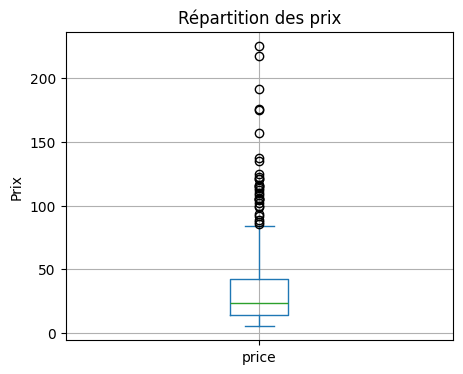

In [ ]:
#Création d'une boîte à moustache de la répartition des prix grâce à Pandas (BOITE A MOUSTACHE OU GRAPHIQUE EN BAR ?)

# Boxplot
plt.figure(figsize=(5, 4))        # Crée une nouvelle figure (taille)
df_final['price'].plot.box()      # Trace un boxplot de la colonne 'price'
plt.title('Répartition des prix') # Titre du graphique
plt.ylabel('Prix')                # Ajoute un nom à l’axe vertical
plt.grid(True)                    # Ajoute une grille
plt.show()


In [ ]:
#Autre méthode avec plotly express

#Boxplot
fig = px.box(df_final, y="price", color="product_type",  title="Répartition des prix", width=600, height=500)
fig.show()

##Etape 4.2 - Exploration par l'utilisation de méthodes statistiques

###Etape 4.2.1 - Identification par le Z-index

Z-score = (valeur - moyenne) / écart-type

Il mesure à combien d’écarts-types chaque prix se trouve de la moyenne :

Z = 0 → valeur égale à la moyenne
Z > 0 → au-dessus de la moyenne
Z < 0 → en dessous de la moyenne

Repérer les valeurs extrêmes :

En général, Z < -3 ou Z > 3 → considéré comme valeur aberrante

In [ ]:
#Calculer la moyenne du prix
moyenne_prix = df_final['price'].mean()                      #.mean() calcule la moyenne (somme des prix / par le nombre d'article)
print(f'La moyenne des prix est de : {moyenne_prix:.2f} €')

#Calculer l'écart-type du prix
ecart_type_prix = df_final['price'].std()                   # .std() calcule l'écart-type. Si faible : prix proche de la moyenne; si élevé : prix dispersés
print(f"L'ecart type est de : {ecart_type_prix:.2f} €")

#Calculer le Z-score
df_final['z_score'] = (df_final['price'] - moyenne_prix) / ecart_type_prix
df_final.head()

La moyenne des prix est de : 32.33 €
L'ecart type est de : 27.60 €


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,post_date,product_type,post_title,z_score
0,3847,True,24.2,16,instock,12.88,15298,6.0,2018-02-08,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,-0.294738
1,3849,True,34.3,10,instock,17.54,15296,9.0,2018-02-08,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.071253
2,3850,True,20.8,0,outofstock,10.64,15300,0.0,2018-02-08,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,-0.417943
3,4032,True,14.1,26,instock,6.92,19814,12.0,2018-02-09,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,-0.660729
4,4039,True,46.0,3,instock,23.77,19815,3.0,2018-02-12,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,0.495222


In [ ]:
# Identifier les valeurs abérrantes

valeurs_aberrantes = df_final[(df_final['z_score'] > 3) | (df_final['z_score'] < -3)]
valeurs_aberrantes.sort_values(by='price', ascending=True)
valeurs_aberrantes[['product_id', 'price', 'z_score']]

,product_id,price,z_score
199,4352,225.0,6.981591
218,4402,176.0,5.205993
221,4406,157.0,4.517496
381,4904,137.0,3.792762
426,5001,217.5,6.709816
511,5612,124.8,3.350674
553,5767,175.0,5.169756
587,5892,191.3,5.760415
603,5917,122.0,3.249211
642,6126,135.0,3.720288


In [ ]:
#Quel est le seuil prix dont le z-score est supérieur à 3? 116€
# On cherche à partir de quel prix les produits sont considérés comme aberrants (Z > 3)

# Calcul du seuil de prix correspondant à un Z-score de +3
seuil_z3 = moyenne_prix + 3 * ecart_type_prix
print(f"Le prix correspondant à un Z-score de +3 est : {seuil_z3:.2f} €")

seuil_z_3 = moyenne_prix - 3 * ecart_type_prix
print(f"Le prix correspondant à un Z-score de -3 est : {seuil_z_3:.2f} €")

# Le prix correspondant à un Z-score de -3 est négatif car l'écart-type est important.
# Ce résultat est mathématiquement correct, mais n’a pas de sens dans la réalité (un prix ne peut pas être < 0).
# On ignore donc ce seuil pour l’analyse métier.


Le prix correspondant à un Z-score de +3 est : 115.12 €
Le prix correspondant à un Z-score de -3 est : -50.46 €


##Etape 4.2.2 - Identification par l'intervalle interquartile

L’IQR (ou interquartile range) mesure la dispersion centrale des données :

IQR=Q3−Q1

Q1 (25%) : premier quartile → 25 % des valeurs sont en-dessous.

Q3 (75%) : troisième quartile → 75 % des valeurs sont en-dessous.

On considère comme aberrante toute valeur :

< Q1 − 1.5 × IQR

Q3 + 1.5 × IQR

In [ ]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion

df_final['price'].describe()

,price
count,714.000000
mean,32.333683
std,27.596332
min,5.200000
25%,14.062500
50%,23.450000
75%,42.075000
max,225.000000



count	        714	              Nombre de produits avec un prix renseigné

mean	        32.33 €         	Prix moyen des produits

std	          27.60 €	          Écart-type élevé = grande dispersion des prix

min	          5.20 €	          Produit le moins cher

25%	          14.06 €         	25 % des produits coûtent moins de 14 €

50%         	23.45 €	          Médiane : la moitié des produits coûtent moins de 23.45 €

75%	          42.08 €	          75 % des produits coûtent moins de 42.08 €

max	          225.00 €	        Prix maximum

In [ ]:
#Définir un seuil pour les articles "outliers" en prix

Q1 = df_final['price'].quantile(0.25)                     # .quantile(x) renvoie la valeur en dessous de laquelle x % des données se trouvent
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1

seuil_min = Q1 - 1.5 * IQR
seuil_max = Q3 + 1.5 * IQR

print(f"IQR : {IQR:.2f}")
print(f"Seuil minimum : {seuil_min:.2f} €")
print(f"Seuil maximum : {seuil_max:.2f} €")

print(f'Q1 : {Q1}')
print(f'Q3 : {Q3}')

IQR : 28.01
Seuil minimum : -27.96 €
Seuil maximum : 84.09 €
Q1 : 14.0625
Q3 : 42.075


In [ ]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

outliers_prix = df_final[df_final['price'] > seuil_max] # Sélectionne toutes les lignes où le prix dépasse le seuil haut défini
nb_outliers = outliers_prix.shape[0]                    # Compte le nombre total d’outliers détectés, .shape[0] donne le nombre de lignes du DataFrame outliers_prix
nb_total = df_final.shape[0]                            # Nombre total de produits dans le DataFrame df_final
pct_outliers = (nb_outliers / nb_total) * 100           # Calcule le pourcentage d’articles considérés comme outliers

print(f"Nombre d'articles outliers : {nb_outliers}")
print(f"Nombre total d'articles : {nb_total}")
print(f"Proportion d'outliers : {pct_outliers:.2f} %")


Nombre d'articles outliers : 31
Nombre total d'articles : 714
Proportion d'outliers : 4.34 %


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

outliers_prix[['purchase_price', 'price', 'product_id']].head(31)

# Les prix d'achat sont proportionnelement élévés par rapport au prix de vente, il s'agit de produit haut de gamme. Cela se justifie.

,purchase_price,price,product_id
63,52.70,100.0,4115
65,44.30,88.4,4132
199,137.81,225.0,4352
205,51.93,85.6,4359
218,78.25,176.0,4402
219,52.22,108.5,4404
221,69.08,157.0,4406
222,46.71,104.0,4407
227,53.80,109.6,4582
380,51.80,102.3,4903


#Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée

##Etape 5.1 - Analyse des ventes en CA

In [ ]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article (= prix unitaire X ventes)

df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']

#Calculer la somme de la colonne "ca_par_article"

ca_total = df_final['ca_par_article'].sum()

#Ce résultat correspond au chiffre d'affaire du site web
print(f'CA total : {ca_total:.2f} € sur le site web')


CA total : 143680.10 € sur le site web


In [ ]:
ca_par_categorie = df_final.groupby('product_type')['ca_par_article'].sum().reset_index()

fig = px.bar(
    ca_par_categorie,
    x='product_type',
    y='ca_par_article',
    title="Chiffre d'affaires par catégorie",
    labels={'product_type': 'Catégorie', 'ca_par_article': 'CA (€)'}
)
fig.show()


In [ ]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_palmares = df_final.sort_values (by='ca_par_article', ascending=False) # Tri par ordre décroissant = TOP

#Réinitialiser l'index du dataset par un reset_index
df_palmares = df_palmares.reset_index(drop=True)

#Afficher les 20 premiers articles en CA
df_top_20 = df_palmares.head(20) # Conserve le df pour l'utiliser dans le graphique

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(
    df_top_20,
    x='ca_par_article',
    y='post_title',
    title='Top 20 des articles en chiffre d’affaires',
    labels={'post_title': 'Produits', 'ca_par_article': 'Chiffre d\'affaires (€)'}
)
fig.show()

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset (= CA d'un article / CA total toutes ref)
df_final['%_CA'] = df_final['ca_par_article'] /  df_final['ca_par_article'].sum()

#Tri par ordre decroissant
df_ordre_ca = df_final.sort_values(by='ca_par_article', ascending=False).reset_index(drop=True)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_ordre_ca['part_ca_cumulee'] = df_ordre_ca['%_CA'].cumsum() # .cumsum() calcule la somme cumulée des valeurs ligne par ligne (ex. [0.2, 0.3, 0.1] → .cumsum() [0.2, 0.5, 0.6])

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
df_80 = df_ordre_ca[df_ordre_ca['part_ca_cumulee'] <= 0.8] # Garde les produits qui cumulent jusqu'à 80 % du CA total


#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web

#Nb articles dans ce groupe
nb_articles_80 = df_80.shape[0] # .shape[0] renvoie le nombre de lignes (donc d'articles) dans le DataFrame

#Nb total d'articles
nb_total_article = df_final.shape[0]

#Proportion d'article générant 80% du CA
proportion = (nb_articles_80 / nb_total_article) * 100

print(f"Nombre d’articles représentant 80 % du CA : {nb_articles_80}")
print(f"Nombre total d'article dans le catalogue : {nb_total_article}")
print(f"Proportion dans le catalogue : {proportion:.2f} %")

Nombre d’articles représentant 80 % du CA : 434
Nombre total d'article dans le catalogue : 714
Proportion dans le catalogue : 60.78 %


##Etape 5.2 - Analyse des ventes en quantité

In [ ]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index
df_tri_qte = df_final.sort_values(by='total_sales', ascending=False).reset_index(drop=True)


#Afficher les 20 premiers articles en quantité
df_top_20_qte = df_tri_qte.head(20)

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(
    df_top_20_qte,
    x='product_id',
    y='total_sales',
    title='Top 20 des articles en quantités vendues',
    labels={'product_id': 'ID Produit', 'total_sales': 'Quantité vendue'}
)
fig.show()

In [ ]:
##################################
# Calculer le 20 / 80 en Quantité #
##################################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_final['%_qte'] = df_final['total_sales'] / df_final['total_sales'].sum()
df_ordre_qte = df_final.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_ordre_qte['part_qte_cumulee'] = df_ordre_qte['%_qte'].cumsum()

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
df_80_qte = df_ordre_qte[df_ordre_qte['part_qte_cumulee'] <= 0.8]

#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web

#Nombre d’articles concernés
nb_articles_80_qte = df_80_qte.shape[0]

#Taille totale du catalogue
nb_total_articles = df_final.shape[0]

#Proportion d’articles générant 80 % des ventes
proportion_qte = (nb_articles_80_qte / nb_total_articles) * 100

print(f"Nombre d’articles représentant 80 % des quantités vendues : {nb_articles_80_qte}")
print(f"Proportion dans le catalogue : {proportion_qte:.2f} %")

Nombre d’articles représentant 80 % des quantités vendues : 433
Proportion dans le catalogue : 60.64 %


##Etape 5.3 - Analyse des stocks

In [ ]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Création de la colonne mois_stock
df_final['mois_stock'] = df_final['stock_quantity'] / df_final['total_sales']

#Remplacement des "inf" par 0 sinon le graphique renvoi les valeurs nulle en premier
df_final['mois_stock'] = df_final['mois_stock'].replace([np.inf, -np.inf], 0)
df_final['mois_stock'] = df_final['mois_stock'].fillna(0)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_stock_flop = df_final.sort_values(by='mois_stock', ascending=False).reset_index(drop=True)
df_flop_20 = df_stock_flop.head(20)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
fig = px.bar(
    df_flop_20,
    x='product_id',
    y='mois_stock',
    title='Flop 20 des produits avec le plus de mois de stock',
    labels={'product_id': 'ID Produit', 'mois_stock': 'Mois de stock estimé'}
)
fig.show()

In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final['valorisation_stock_euros'] = df_final['stock_quantity'] * df_final['purchase_price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
valeur_totale_stock = df_final['valorisation_stock_euros'].sum()
print(f"Valeur totale du stock (en €) : {valeur_totale_stock:.2f}")

Valeur totale du stock (en €) : 277350.37


In [ ]:
nombre_article_vendu = df_final['total_sales'].sum()
print(nombre_article_vendu)

5751.0


In [ ]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
nb_total_unites_stock = df_final['stock_quantity'].sum()
print(f"Nombre total d’unités en stock : {nb_total_unites_stock}")

Nombre total d’unités en stock : 16741


##Etape 5.4 - Analyse du taux de marge

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne Prix HT (Normalement le CA est toujours exprimé HT. Je pars du principe que dans le fichier c'est TTC. Il faut donc retirer 20 %)

df_final['price_HT'] = df_final['price'] / 1.2                                                            # Calcule le prix HT à partir du prix TTC (hypothèse : TVA = 20 %)

#Création de la colonne Taux de marge (= prix HT - prix achat / prix HT)
df_final['taux_marge'] = (df_final['price_HT'] - df_final['purchase_price']) / df_final['price_HT'] * 100

#Afficher le prix minimum de la colonne "taux_marge"
#Afficher le prix maximum de la colonne "taux_marge"
min_marge = df_final['taux_marge'].min()
max_marge = df_final['taux_marge'].max()

print(f"Taux de marge minimum : {min_marge:.2f}%")
print(f"Taux de marge maximum : {max_marge:.2f}%")

Taux de marge minimum : -634.99%
Taux de marge maximum : 47.76%


In [ ]:
# Filtrer les produits dont le taux de marge est négatif
marge_negative = df_final[df_final['taux_marge'] <= 0]

# Afficher les colonnes clés pour analyse
marge_negative[['product_id', 'post_title', 'price', 'purchase_price', 'price_HT', 'taux_marge']].sort_values(by='taux_marge').head(10)


,product_id,post_title,price,purchase_price,price_HT,taux_marge
201,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,12.65,77.48,10.541667,-634.988142


In [ ]:
#Création d'un dataframe avec les taux positifs
df_marge_positive = df_final[df_final['taux_marge'] > 0]

#Afficher le prix minimum de la colonne "taux_marge"
#Afficher le prix maximum de la colonne "taux_marge"

min_marge_pos = df_marge_positive['taux_marge'].min()
max_marge_pos = df_marge_positive['taux_marge'].max()

print(f"Taux de marge positif minimum : {min_marge_pos:.2f}%")
print(f"Taux de marge positif maximum : {max_marge_pos:.2f}%")

Taux de marge positif minimum : 22.78%
Taux de marge positif maximum : 47.76%


In [ ]:
top_marge = df_marge_positive.sort_values(by='taux_marge', ascending=False)
top_10_marge = top_marge[['product_id', 'post_title', 'taux_marge', 'total_sales']].head(10)
top_10_marge.head(10)


,product_id,post_title,taux_marge,total_sales
217,4401,Cognac Frapin VSOP,47.756800,3.0
602,5916,Wemyss Malts Single Cask Scotch Whisky Chocola...,47.754839,1.0
599,5912,Kingsbarns Distillery Lowland Single Malt Whisky,47.200000,2.0
221,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,47.200000,4.0
603,5917,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,46.649180,3.0
218,4402,Cognac Frapin VIP XO,46.647727,3.0
208,4392,Wemyss Malts Blended Malt Scotch Whisky Spice ...,46.642424,3.0
207,4391,Wemyss Malts Blended Malt Scotch Whisky Peat C...,46.642424,5.0
222,4407,Cognac Frapin Cigar Blend,46.103846,5.0
608,5932,Cognac Normandin Mercier VFC,45.549249,0.0


In [ ]:
#Création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_par_type = df_final.groupby('product_type')['taux_marge'].mean().reset_index()

df_marge_par_type = df_marge_par_type.sort_values(by='taux_marge', ascending=False)

#Affichage dans un graphique du taux de marge par type de produit
fig = px.bar(
    df_marge_par_type,
    x='product_type',
    y='taux_marge',
    title='Taux de marge moyen par type de produit',
    labels={'product_type': 'Type de produit', 'taux_marge': 'Taux de marge moyen'}
)
fig.show()

#Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price

Une heatmap est un tableau coloré qui te permet de visualiser des valeurs numériques, souvent des corrélations ou des intensités.

Chaque case du tableau représente une relation entre deux variables (ex : price vs total_sales)

La couleur indique l’intensité et la direction de la corrélation :

+1 = forte corrélation positive (les deux augmentent ensemble)

-1 = forte corrélation négative (quand l’un monte, l’autre baisse)

0 = pas de corrélation

Une heatmap de corrélation t’aide à repérer rapidement quelles variables sont liées entre elles — ou pas — pour orienter tes analyses.


In [ ]:
############################
# Analyse des corrélations #
############################

#Création d'une heatmap de corrélation avec les variables stock, sales et price
#On peut également créer un mask pour n'afficher qu'une demi heatmap

colonnes_correlation = ['total_sales', 'price', 'stock_quantity']
df_correlation = df_final[colonnes_correlation]


In [ ]:
correlation = df_correlation.corr() # C’est une méthode de Pandas qui calcule la corrélation linéaire de Pearson entre chaque paire de colonnes numériques du DataFrame.
                                    # Elle retourne une matrice symétrique où chaque cellule représente le coefficient de corrélation entre deux variables

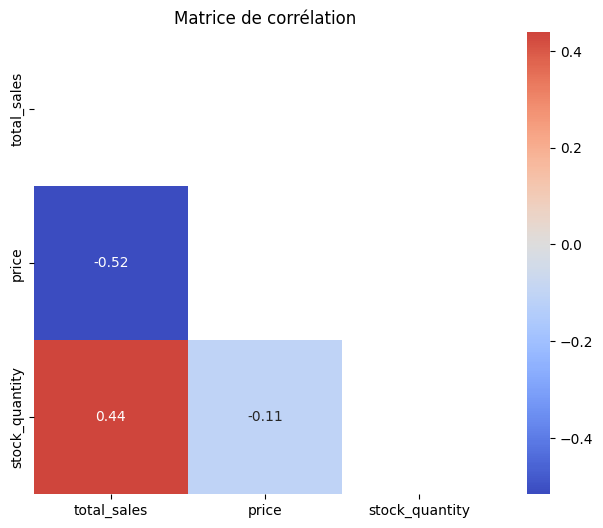

In [ ]:
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, mask=mask, annot=True, cmap="coolwarm", center=0, square=True)
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
#Que peut-on conclure des corrélations ?

# Prix et ventes : –0,52 → corrélation négative modérée plus un produit est cher, moins il se vend.
#Cela peut traduire une sensibilité au prix, ou simplement un effet “haut de gamme” moins accessible.

# et ventes : +0,44 → corrélation positive modérée Les produits les mieux approvisionnés se vendent davantage.
#Cela montre que les flux de stocks suivent globalement la courbe des ventes. Mais une corrélation de 0,44 reste modérée, ce qui laisse entendre qu’il existe encore une marge d’optimisation possible dans l’alignement entre stock et demande réelle.

#Prix et stock : –0,11 → corrélation très faible Il n’y a pas de lien significatif entre le prix d’un produit et la quantité qu’on garde en stock.

#Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.

df_final.to_excel("df_final.xlsx", index=False)
from google.colab import files
files.download("df_final.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!jupyter nbconvert \
    "/content/drive/MyDrive/Formation DATA ANALYST/P6/Bardey_Remi_1_notebook_062025.ipynb" \
    --to html \
    --execute \
    --output /content/notebook_full.html


[NbConvertApp] Converting notebook /content/drive/MyDrive/Formation DATA ANALYST/P6/Bardey_Remi_1_notebook_062025.ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Wri

In [ ]:
from google.colab import files
files.download('/content/notebook_full.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>